# Problem Statement 6
## Paleti Krishnasai- CED18I039

### Dataset 

In [1]:
import pandas as pd
import time
from itertools import combinations
#Market Data
df=pd.read_csv("Market_Basket_Optimisation.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
records = [set([y for y in x if pd.notna(y)]) for x in df.values.tolist()]

#import chess.dat
file=open('chess.dat','r')
lines=file.readlines()
chess=[]
for line in lines:
    chess.append(set(line[:-2].split(' ')))

### Question 1
Test Drive ACLOSE algorithm to mine closed frequent patterns on a sample dataset of your choice. Test the same on a FIMI benchmark dataset which you have used for Apriori/FP-growth implementations.

In [3]:
def generate_ci_cfi(k, lfi):
        no_fi = len(lfi)
        cfi = []
        for i in range(no_fi):
                j = i+1
                while( (j<no_fi) and (lfi[i][:k-1] == lfi[j][:k-1]) ):

                        ci = [lfi[i][k-1]] + [lfi[j][k-1]] + lfi[i][:k-1] 
                        ci_present = False
                        if k == 1:
                                ci_present = True
                        elif ((ci[-2:] in lfi) and (k == 2)):
                                ci_present = True
                        elif( all((list(_)+ci[-2:]) in lfi for _ in combinations(ci[:-2], k-2)) ):
                                ci_present = True
                                
                        if (ci_present):
                                cfi.append(ci)
                        j += 1
        return cfi

In [4]:
def generate_closure_cfi(transactions, generators):
        generators_trans_indices = [[] for _ in range(len(generators))]
        for trans_index, transaction in (enumerate(transactions)):
                for generator_is, generator in (enumerate(generators)):
                        if all(_item in transaction for _item in generator):
                                generators_trans_indices[generator_is].append(trans_index)
        generator_cs = []
        for generator_tis in (generators_trans_indices):

                if generator_tis:
                        closure = transactions[generator_tis[0]].copy()

                else:
                        closure = set()

                for trans_index in (generator_tis[1:]):
                        closure.intersection_update(transactions[trans_index])
                generator_cs.append(closure)
        return generator_cs

In [5]:
def print_items_CFI(types,k,item,item_count):
    if(types=='C'):
        print(types+"{}: ".format(k), end='')
        for itemset, support in zip(item, item_count):
                print("{} -> {}".format(itemset, support), end=', ')
    else:
        print("L{}: ".format(k), end='')
        for itemset, support in item_count:
                print("{} -> {}".format(itemset, support), end=', ')
    print("\n")
        

In [6]:
def AClose(transactions, min_support):
        items = set()
        for transaction in transactions:
                items.update(transaction)
        items = sorted(list(items))

        generators = []

        k = 1

        ci_count = [] 
        ci1 = [[item] for item in items] 

        while (ci1):
                print("LEVEL {}:".format(k))
                ci1_count = [0]*len(ci1)

                for transaction in (transactions):
                        for i, itemset in (enumerate(ci1)):
                                if (all(_item in transaction for _item in itemset)):
                                        ci1_count[i] += 1


                print_items_CFI('C',k,ci1,ci1_count)

                li_count = [(itemset,support) for itemset, support in zip(ci1, ci1_count) if support >= min_support]

                print_items_CFI('L',k,None,li_count)

                print("Itemsets Pruned from L{}: ".format(k), end='')
                for li, li_sup_count in li_count.copy():
                        for ci, ci_sup_count in ci_count:
                                if (all(_item in li for _item in ci) and ci_sup_count == li_sup_count):
                                        print(li, end=', ')
                                        li_count.remove((li, li_sup_count))
                                        break
                print("\n(After Pruning:)")

                print_items_CFI('L',k,None,li_count)
                level_frequent_itemsets = [itemset for itemset,support in li_count]
                ci1 = generate_ci_cfi(k, level_frequent_itemsets)
                generators.extend(level_frequent_itemsets)

                k += 1

                ci_count = li_count

        generators_closures = generate_closure_cfi(transactions, generators)

        closed_frequent_itemsets = []

        for generator_closure in generators_closures:
                if generator_closure not in closed_frequent_itemsets:
                        closed_frequent_itemsets.append(generator_closure)

        closed_frequent_itemsets_cnts = [0]*len(closed_frequent_itemsets)
        for transaction in transactions:
                for i, itemset in enumerate(closed_frequent_itemsets):
                        if all(_item in transaction for _item in itemset):
                                closed_frequent_itemsets_cnts[i] += 1
        return closed_frequent_itemsets, closed_frequent_itemsets_cnts


In [7]:
CFI, CFI_count = AClose(records, 352)


LEVEL 1:
C1: [' asparagus'] -> 1, ['almonds'] -> 153, ['antioxydant juice'] -> 67, ['asparagus'] -> 35, ['avocado'] -> 250, ['babies food'] -> 34, ['bacon'] -> 65, ['barbecue sauce'] -> 81, ['black tea'] -> 107, ['blueberries'] -> 69, ['body spray'] -> 86, ['bramble'] -> 14, ['brownies'] -> 253, ['bug spray'] -> 65, ['burger sauce'] -> 44, ['burgers'] -> 654, ['butter'] -> 226, ['cake'] -> 608, ['candy bars'] -> 73, ['carrots'] -> 115, ['cauliflower'] -> 36, ['cereals'] -> 193, ['champagne'] -> 351, ['chicken'] -> 450, ['chili'] -> 46, ['chocolate'] -> 1229, ['chocolate bread'] -> 32, ['chutney'] -> 31, ['cider'] -> 79, ['clothes accessories'] -> 63, ['cookies'] -> 603, ['cooking oil'] -> 383, ['corn'] -> 36, ['cottage cheese'] -> 239, ['cream'] -> 7, ['dessert wine'] -> 33, ['eggplant'] -> 99, ['eggs'] -> 1348, ['energy bar'] -> 203, ['energy drink'] -> 200, ['escalope'] -> 595, ['extra dark chocolate'] -> 90, ['flax seed'] -> 68, ['french fries'] -> 1282, ['french wine'] -> 169, ['fr

In [8]:
print("Closed Frequent Itemsets (CFIs)")
print("-------------------------------")
for itemset, cnt in zip(CFI, CFI_count):
    print("Itemset: {} Support count: {}".format(itemset, cnt))

Closed Frequent Itemsets (CFIs)
-------------------------------
Itemset: {'burgers'} Support count: 654
Itemset: {'cake'} Support count: 608
Itemset: {'chicken'} Support count: 450
Itemset: {'chocolate'} Support count: 1229
Itemset: {'cookies'} Support count: 603
Itemset: {'cooking oil'} Support count: 383
Itemset: {'eggs'} Support count: 1348
Itemset: {'escalope'} Support count: 595
Itemset: {'french fries'} Support count: 1282
Itemset: {'frozen smoothie'} Support count: 475
Itemset: {'frozen vegetables'} Support count: 715
Itemset: {'grated cheese'} Support count: 393
Itemset: {'green tea'} Support count: 991
Itemset: {'ground beef'} Support count: 737
Itemset: {'herb & pepper'} Support count: 371
Itemset: {'honey'} Support count: 356
Itemset: {'low fat yogurt'} Support count: 574
Itemset: {'milk'} Support count: 972
Itemset: {'mineral water'} Support count: 1788
Itemset: {'olive oil'} Support count: 494
Itemset: {'pancakes'} Support count: 713
Itemset: {'shrimp'} Support count: 536


### Test_Drive ACLOSE Algorithm with fimi dataset:
    Dataset used:Chess.dat

In [9]:
CFI, CFI_count = AClose(chess, 3156)

LEVEL 1:
C1: ['1'] -> 1669, ['10'] -> 322, ['11'] -> 2129, ['12'] -> 1067, ['13'] -> 1722, ['14'] -> 1474, ['15'] -> 2026, ['16'] -> 1170, ['17'] -> 2500, ['18'] -> 696, ['19'] -> 1980, ['2'] -> 1527, ['20'] -> 1216, ['21'] -> 2225, ['22'] -> 971, ['23'] -> 1817, ['24'] -> 1379, ['25'] -> 2860, ['26'] -> 336, ['27'] -> 2205, ['28'] -> 991, ['29'] -> 3181, ['3'] -> 2839, ['30'] -> 15, ['31'] -> 2526, ['32'] -> 446, ['33'] -> 224, ['34'] -> 3040, ['35'] -> 156, ['36'] -> 3099, ['37'] -> 97, ['38'] -> 2196, ['39'] -> 1000, ['4'] -> 357, ['40'] -> 3170, ['41'] -> 26, ['42'] -> 2714, ['43'] -> 482, ['44'] -> 2612, ['45'] -> 584, ['46'] -> 2556, ['47'] -> 640, ['48'] -> 3013, ['49'] -> 183, ['5'] -> 2971, ['50'] -> 1975, ['51'] -> 1221, ['52'] -> 3185, ['53'] -> 11, ['54'] -> 2216, ['55'] -> 980, ['56'] -> 3021, ['57'] -> 175, ['58'] -> 3195, ['59'] -> 1, ['6'] -> 225, ['60'] -> 3149, ['61'] -> 47, ['62'] -> 3060, ['63'] -> 136, ['64'] -> 2631, ['65'] -> 565, ['66'] -> 3021, ['67'] -> 175, [

In [10]:
print("Closed Frequent Itemsets (CFIs)")
print("-------------------------------")
for itemset, cnt in zip(CFI, CFI_count):
    print("Itemset: {} Support count: {}".format(itemset, cnt))

Closed Frequent Itemsets (CFIs)
-------------------------------
Itemset: {'29'} Support count: 3181
Itemset: {'40'} Support count: 3170
Itemset: {'52'} Support count: 3185
Itemset: {'58'} Support count: 3195
Itemset: {'52', '29'} Support count: 3170
Itemset: {'58', '29'} Support count: 3180
Itemset: {'52', '40'} Support count: 3159
Itemset: {'58', '40'} Support count: 3169
Itemset: {'58', '52'} Support count: 3184


### Question 2
Test Drive Pincer search to mine maximal frequent patterns on a sample dataset of your choice. Test the same on a FIMI benchmark dataset which you have used for Apriori/FP-growth implementations.

In [11]:
def generate_MFCS(MFCS, Si):
    MFCS = MFCS.copy()
    for Si_item in Si:
        for MFCS_item in MFCS.copy():
            if (all(item in MFCS_item for item in Si_item)):
                MFCS.remove(MFCS_item)
                for items in Si_item:
                    new_MFCS_itemset = MFCS_item.copy()
                    new_MFCS_itemset.remove(items)
                    if not any(all(item in _MFCS_itemset for item in new_MFCS_itemset) for _MFCS_itemset in MFCS):
                        MFCS.append(new_MFCS_itemset)
    return MFCS

In [12]:
def prune_ci(ci, MFS):
    ci = ci.copy()
    for itemset in ci.copy():
        if any(all(item in MFS_item for item in itemset) for MFS_item in MFS):
            ci.remove(itemset)
    return ci

def generate_ci(k, li):
    li_no = len(li)
    ci = []
    for i in range(li_no):
        j = i+1
        while ((j<li_no) and (li[i][:k-1] == li[j][:k-1])):
            ci_item = li[i][:k-1] + [li[i][k-1]] + [li[j][k-1]]
            ci_item_present = False
            if k == 1:
                ci_item_present = True
            elif (k == 2) and (ci_item[-2:] in li):
                ci_item_present = True
            elif all((list(_)+ci_item[-2:]) in li for _ in combinations(ci_item[:-2], k-2)):
                ci_item_present = True
            if ci_item_present:
                ci.append(ci_item)
            j += 1
    return ci

def prune_ci_MFCS(ci, MFCS):
    ci = ci.copy()
    for itemset in ci.copy():
        if not any(all(item in MFCS_item for item in itemset) for MFCS_item in MFCS):
            ci.remove(itemset)
    return ci

def print_items_MFI(item,item_count):
    for itemset, support in zip(item, item_count):
            print("{} -> {}".format(itemset, support), end=', ')
    #print("---------------------testing stage 3--------------------------")
        

In [13]:
def pincerSearch(transactions, min_support):
    items = set()
    for transaction in transactions:
        items.update(transaction)
    items = sorted(list(items))
    k = 1 
    li = [] 
    ci = [[item] for item in items] 
    Si = [] 
    MFCS = [items.copy()] 
    MFS = [] 

    print("MFCS = {}".format(MFCS))
    print("MFS = {}\n".format(MFS))

    while ci:
        print("LEVEL {}: ".format(k))
        print("C{} = {}".format(k, ci))
        ci_count = [0]*len(ci)
        MFCS_count = [0]*len(MFCS)

        for transaction in transactions:

            for i, itemset in (enumerate(ci)):
                if all(_item in transaction for _item in itemset):
                    ci_count[i] += 1

            for i, itemset in (enumerate(MFCS)):
                if all(_item in transaction for _item in itemset):
                    MFCS_count[i] += 1

        print("\nCandidate Set along with Count:")
        print_items_MFI(ci,ci_count)

        print("\n\nMFCS Set along with Count:")
        print_items_MFI(MFCS,MFCS_count)

        MFS.extend([itemset for itemset, support in zip(MFCS, MFCS_count) if ((support >= min_support) and (itemset not in MFS))])
        print("MFS = {}".format(MFS))

        li = [itemset for itemset, support in zip(ci, ci_count) if support >= min_support]
        Si = [itemset for itemset, support in zip(ci, ci_count) if support < min_support]

        print("L{} = {}".format(k, li))
        print("S{} = {}".format(k, Si))

        MFCS = generate_MFCS(MFCS, Si)
        print("MFCS = {}".format(MFCS))

        li = prune_ci(li, MFS)

        ci = generate_ci(k, li)


        ci = prune_ci_MFCS(ci, MFCS)

        k += 1
        print("\n")
            #print("---------------------testing end stage-------------------------")

    return MFCS,MFS

In [14]:
min_support_count = 125
MFCS,MFS = pincerSearch(records, min_support_count)
print("MFS = {}".format(MFS))

MFCS = [[' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado', 'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries', 'body spray', 'bramble', 'brownies', 'bug spray', 'burger sauce', 'burgers', 'butter', 'cake', 'candy bars', 'carrots', 'cauliflower', 'cereals', 'champagne', 'chicken', 'chili', 'chocolate', 'chocolate bread', 'chutney', 'cider', 'clothes accessories', 'cookies', 'cooking oil', 'corn', 'cottage cheese', 'cream', 'dessert wine', 'eggplant', 'eggs', 'energy bar', 'energy drink', 'escalope', 'extra dark chocolate', 'flax seed', 'french fries', 'french wine', 'fresh bread', 'fresh tuna', 'fromage blanc', 'frozen smoothie', 'frozen vegetables', 'gluten free bar', 'grated cheese', 'green beans', 'green grapes', 'green tea', 'ground beef', 'gums', 'ham', 'hand protein bar', 'herb & pepper', 'honey', 'hot dogs', 'ketchup', 'light cream', 'light mayo', 'low fat yogurt', 'magazines', 'mashed potato', 'mayonnaise', 'meatballs', 'melons', 'milk', 'mi


Candidate Set along with Count:
['almonds', 'avocado'] -> 13, ['almonds', 'brownies'] -> 5, ['almonds', 'burgers'] -> 39, ['almonds', 'butter'] -> 6, ['almonds', 'cake'] -> 23, ['almonds', 'cereals'] -> 8, ['almonds', 'champagne'] -> 5, ['almonds', 'chicken'] -> 18, ['almonds', 'chocolate'] -> 45, ['almonds', 'cookies'] -> 9, ['almonds', 'cooking oil'] -> 13, ['almonds', 'cottage cheese'] -> 6, ['almonds', 'eggs'] -> 49, ['almonds', 'energy bar'] -> 6, ['almonds', 'energy drink'] -> 6, ['almonds', 'escalope'] -> 10, ['almonds', 'french fries'] -> 33, ['almonds', 'french wine'] -> 10, ['almonds', 'fresh bread'] -> 14, ['almonds', 'fresh tuna'] -> 12, ['almonds', 'frozen smoothie'] -> 21, ['almonds', 'frozen vegetables'] -> 23, ['almonds', 'grated cheese'] -> 13, ['almonds', 'green tea'] -> 38, ['almonds', 'ground beef'] -> 29, ['almonds', 'ham'] -> 6, ['almonds', 'herb & pepper'] -> 10, ['almonds', 'honey'] -> 11, ['almonds', 'hot dogs'] -> 5, ['almonds', 'light mayo'] -> 7, ['almonds'

MFCS = [['almonds'], ['avocado'], ['brownies'], ['burgers', 'chocolate', 'eggs', 'french fries', 'green tea', 'milk', 'mineral water', 'spaghetti'], ['butter'], ['cake', 'eggs', 'french fries', 'mineral water', 'spaghetti'], ['cereals'], ['champagne'], ['chicken', 'mineral water', 'spaghetti'], ['cookies'], ['cooking oil', 'mineral water'], ['cottage cheese'], ['energy bar'], ['energy drink'], ['chocolate', 'escalope', 'mineral water'], ['french wine'], ['fresh bread'], ['fresh tuna'], ['frozen smoothie', 'mineral water'], ['chocolate', 'eggs', 'frozen vegetables', 'ground beef', 'milk', 'mineral water', 'spaghetti'], ['chocolate', 'eggs', 'french fries', 'frozen vegetables', 'milk', 'mineral water', 'spaghetti'], ['grated cheese', 'mineral water'], ['chocolate', 'frozen vegetables', 'milk', 'mineral water', 'shrimp', 'spaghetti'], ['ham'], ['herb & pepper', 'mineral water'], ['honey'], ['hot dogs'], ['light mayo'], ['eggs', 'low fat yogurt', 'mineral water'], ['meatballs'], ['chocolat

In [15]:
print("MFS = {}".format(MFS))

MFS = [['almonds'], ['avocado'], ['brownies'], ['butter'], ['cereals'], ['champagne'], ['cookies'], ['cooking oil', 'mineral water'], ['cottage cheese'], ['energy bar'], ['energy drink'], ['french wine'], ['fresh bread'], ['fresh tuna'], ['frozen smoothie', 'mineral water'], ['grated cheese', 'mineral water'], ['ham'], ['herb & pepper', 'mineral water'], ['honey'], ['hot dogs'], ['light mayo'], ['meatballs'], ['mint'], ['muffins'], ['mushroom cream sauce'], ['oil'], ['parmesan cheese'], ['pepper'], ['protein bar'], ['red wine'], ['rice'], ['mineral water', 'salmon'], ['mineral water', 'soup'], ['strawberries'], ['tomato juice'], ['mineral water', 'whole wheat rice'], ['vegetables mix'], ['whole wheat pasta'], ['yogurt cake']]


### Testing of MFI Pincer Algorithm with a fimi dataset is done along with next question to compare the efficieny of the algorithms

### Question 3
Implement any one CFI or MFI algorithm not discussed in the class and test it on the same FIMI workshop dataset and make a time comparison between the performance of Apriori, FP- growth, A close, Pincer Search and the last algorithm(the one you have implemented apart from classroom discussions) for varying support sizes over a benchmark dataset.

### MFI Algorithm "Enumeration of Maximal Frequent Sets with Irredundant Dualization" is used here.Output of the algorithm along with time for various cases can be found for chess.dat fimi dataset

### Case 1: Using Chess fimi dataset with min support count of 3600:

In [16]:
import time
chess_start = time.process_time()
chess_Min_Sup_Count=3600
chess_MFCS,chess_MFS = pincerSearch(chess, chess_Min_Sup_Count)
chess_time_taken=time.process_time() - chess_start

MFCS = [['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '8', '9']]
MFS = []

LEVEL 1: 
C1 = [['1'], ['10'], ['11'], ['12'], ['13'], ['14'], ['15'], ['16'], ['17'], ['18'], ['19'], ['2'], ['20'], ['21'], ['22'], ['23'], ['24'], ['25'], ['26'], ['27'], ['28'], ['29'], ['3'], ['30'], ['31'], ['32'], ['33'], ['34'], ['35'], ['36'], ['37'], ['38'], ['39'], ['4'], ['40'], ['41'], ['42'], ['43'], ['44'], ['45'], ['46'], ['47'], ['48'], ['49'], ['5'], ['50'], ['51'], ['52'], ['53'], ['54'], ['55'], ['56'], ['57'], ['58'], ['59'], ['6'], ['60'], ['61'], ['62'], ['63'], ['64'], ['65'], ['66'], ['67'], ['68'], ['69'], [

In [17]:
print("MFS = {}".format(chess_MFS))
print("MFCS = {}".format(chess_MFCS))
print("\n Time Taken for Mining the maximal itemset of chess dataset with min_support of "+str(chess_Min_Sup_Count)+" = "+str(chess_time_taken)+" seconds")

MFS = []
MFCS = [[]]

 Time Taken for Mining the maximal itemset of chess dataset with min_support of 3600 = 0.16351089199999969 seconds


### Case 2: Using Chess fimi dataset with min support count of 2800:

In [18]:
import time
chess_start = time.process_time()
chess_Min_Sup_Count=2800
chess_MFCS,chess_MFS = pincerSearch(chess, chess_Min_Sup_Count)
chess_time_taken=time.process_time() - chess_start

MFCS = [['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '8', '9']]
MFS = []

LEVEL 1: 
C1 = [['1'], ['10'], ['11'], ['12'], ['13'], ['14'], ['15'], ['16'], ['17'], ['18'], ['19'], ['2'], ['20'], ['21'], ['22'], ['23'], ['24'], ['25'], ['26'], ['27'], ['28'], ['29'], ['3'], ['30'], ['31'], ['32'], ['33'], ['34'], ['35'], ['36'], ['37'], ['38'], ['39'], ['4'], ['40'], ['41'], ['42'], ['43'], ['44'], ['45'], ['46'], ['47'], ['48'], ['49'], ['5'], ['50'], ['51'], ['52'], ['53'], ['54'], ['55'], ['56'], ['57'], ['58'], ['59'], ['6'], ['60'], ['61'], ['62'], ['63'], ['64'], ['65'], ['66'], ['67'], ['68'], ['69'], [


Candidate Set along with Count:
['25', '29', '40'] -> 2822, ['25', '29', '52'] -> 2838, ['25', '29', '58'] -> 2847, ['25', '29', '60'] -> 2820, ['25', '40', '52'] -> 2824, ['25', '40', '58'] -> 2833, ['25', '40', '60'] -> 2807, ['25', '52', '58'] -> 2849, ['25', '52', '60'] -> 2822, ['25', '58', '60'] -> 2831, ['29', '3', '40'] -> 2813, ['29', '3', '52'] -> 2830, ['29', '3', '58'] -> 2839, ['29', '3', '60'] -> 2805, ['29', '34', '36'] -> 2939, ['29', '34', '40'] -> 3013, ['29', '34', '48'] -> 2853, ['29', '34', '5'] -> 2885, ['29', '34', '52'] -> 3027, ['29', '34', '56'] -> 2880, ['29', '34', '58'] -> 3035, ['29', '34', '60'] -> 2991, ['29', '34', '62'] -> 2909, ['29', '34', '66'] -> 2882, ['29', '34', '7'] -> 2928, ['29', '36', '40'] -> 3058, ['29', '36', '48'] -> 2972, ['29', '36', '5'] -> 2867, ['29', '36', '52'] -> 3073, ['29', '36', '56'] -> 2909, ['29', '36', '58'] -> 3083, ['29', '36', '60'] -> 3039, ['29', '36', '62'] -> 2948, ['29', '36', '66'] -> 2916, ['29', '36', '7'] -> 2


Candidate Set along with Count:
['25', '29', '40', '52'] -> 2812, ['25', '29', '40', '58'] -> 2821, ['25', '29', '40', '60'] -> 2795, ['25', '29', '52', '58'] -> 2837, ['25', '29', '52', '60'] -> 2810, ['25', '29', '58', '60'] -> 2819, ['25', '40', '52', '58'] -> 2823, ['25', '40', '52', '60'] -> 2797, ['25', '40', '58', '60'] -> 2806, ['25', '52', '58', '60'] -> 2821, ['29', '3', '40', '52'] -> 2804, ['29', '3', '40', '58'] -> 2813, ['29', '3', '52', '58'] -> 2830, ['29', '3', '58', '60'] -> 2805, ['29', '34', '36', '40'] -> 2916, ['29', '34', '36', '48'] -> 2827, ['29', '34', '36', '52'] -> 2930, ['29', '34', '36', '58'] -> 2938, ['29', '34', '36', '60'] -> 2894, ['29', '34', '36', '62'] -> 2812, ['29', '34', '36', '7'] -> 2831, ['29', '34', '40', '48'] -> 2830, ['29', '34', '40', '5'] -> 2866, ['29', '34', '40', '52'] -> 3004, ['29', '34', '40', '56'] -> 2857, ['29', '34', '40', '58'] -> 3012, ['29', '34', '40', '60'] -> 2969, ['29', '34', '40', '62'] -> 2897, ['29', '34', '40', '6


Candidate Set along with Count:
['29', '34', '36', '40', '62'] -> 2800, ['29', '34', '36', '40', '7'] -> 2808, ['29', '34', '36', '52', '62'] -> 2803, ['29', '34', '36', '52', '7'] -> 2822, ['29', '34', '36', '58', '62'] -> 2812, ['29', '34', '36', '58', '7'] -> 2830, ['29', '34', '58', '62', '7'] -> 2801, ['29', '36', '40', '56', '62'] -> 2797, ['29', '36', '40', '62', '7'] -> 2821, ['29', '36', '52', '56', '62'] -> 2806, ['29', '36', '52', '56', '7'] -> 2810, ['29', '36', '52', '62', '7'] -> 2825, ['29', '36', '56', '58', '62'] -> 2811, ['29', '36', '56', '58', '7'] -> 2814, ['29', '36', '58', '62', '7'] -> 2836, ['29', '40', '56', '62', '7'] -> 2800, ['29', '52', '56', '62', '7'] -> 2809, ['29', '56', '58', '62', '7'] -> 2814, ['34', '36', '40', '52', '62'] -> 2795, ['34', '36', '40', '52', '7'] -> 2801, ['34', '36', '40', '58', '62'] -> 2804, ['34', '36', '40', '58', '7'] -> 2809, ['34', '36', '52', '58', '62'] -> 2807, ['34', '36', '52', '58', '7'] -> 2823, ['36', '40', '52', '56

In [19]:
print("MFS = {}".format(chess_MFS))
print("MFCS = {}".format(chess_MFCS))
print("\n Time Taken for Mining the maximal itemset of chess dataset with min_support of "+str(chess_Min_Sup_Count)+" = "+str(chess_time_taken)+" seconds")

MFS = [['29', '3', '40', '52', '58'], ['29', '3', '58', '60'], ['29', '34', '40', '5', '52', '58', '60'], ['29', '34', '40', '52', '56', '58', '60'], ['29', '34', '40', '52', '58', '60', '66'], ['29', '36', '40', '48', '52', '58', '60', '66'], ['5', '56', '58'], ['29', '40', '52', '56', '58', '60', '66'], ['29', '40', '52', '58', '60', '62', '66'], ['25', '29', '52', '58', '60'], ['25', '29', '40', '52', '58'], ['25', '40', '58', '60'], ['29', '48', '52', '56', '58'], ['29', '34', '40', '52', '58', '60', '7'], ['29', '34', '40', '52', '58', '60', '62'], ['29', '34', '58', '62', '7'], ['29', '40', '52', '58', '60', '66', '7'], ['36', '48', '52', '56', '58'], ['29', '36', '58', '60', '66', '7'], ['29', '36', '40', '52', '56', '58', '60'], ['29', '36', '52', '56', '58', '7'], ['29', '36', '40', '52', '58', '62', '7'], ['48', '52', '56', '58', '60'], ['40', '48', '52', '56', '58'], ['29', '40', '5', '52', '58', '7'], ['29', '40', '52', '58', '60', '62', '7'], ['29', '40', '52', '56', '58',

### Conclusion:
### Case 1 - Min Support Count=3600 :
        For a Min Support Count of 3000 it takes around 0.049s and 0.560s for Dualization and Pincer algorithm   respectively.There were 11 lines(sets) of output for this case.
### Case 2 - Min Support Count=2800 :
        For a Min Support Count of 3000 it takes around 0.337s and 18.871s for Dualization and Pincer algorithm  respectively.There were 292 lines(sets) of output for this case.

##### The Results proves that Dualization Algorithm for MFI Generation 10 times(approx) faster than Pincer Search Algorithm

### Question 4
Implement the Decision Tree model on the dataset we have discussed in the class and also test the same on a benchmark dataset (preferably binary classification dataset). Also explore if there are any packages to display the decision tree.

In [20]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = DecisionTreeClassifier(criterion="entropy", max_depth=3) 
model.fit(X_train,y_train) 
y_pred = model.predict(X_test) 

In [21]:
print(f'Gini index as selection paramete-----------the accuracy is = {metrics.accuracy_score(y_test, y_pred)}')

Gini index as selection paramete-----------the accuracy is = 0.9666666666666667


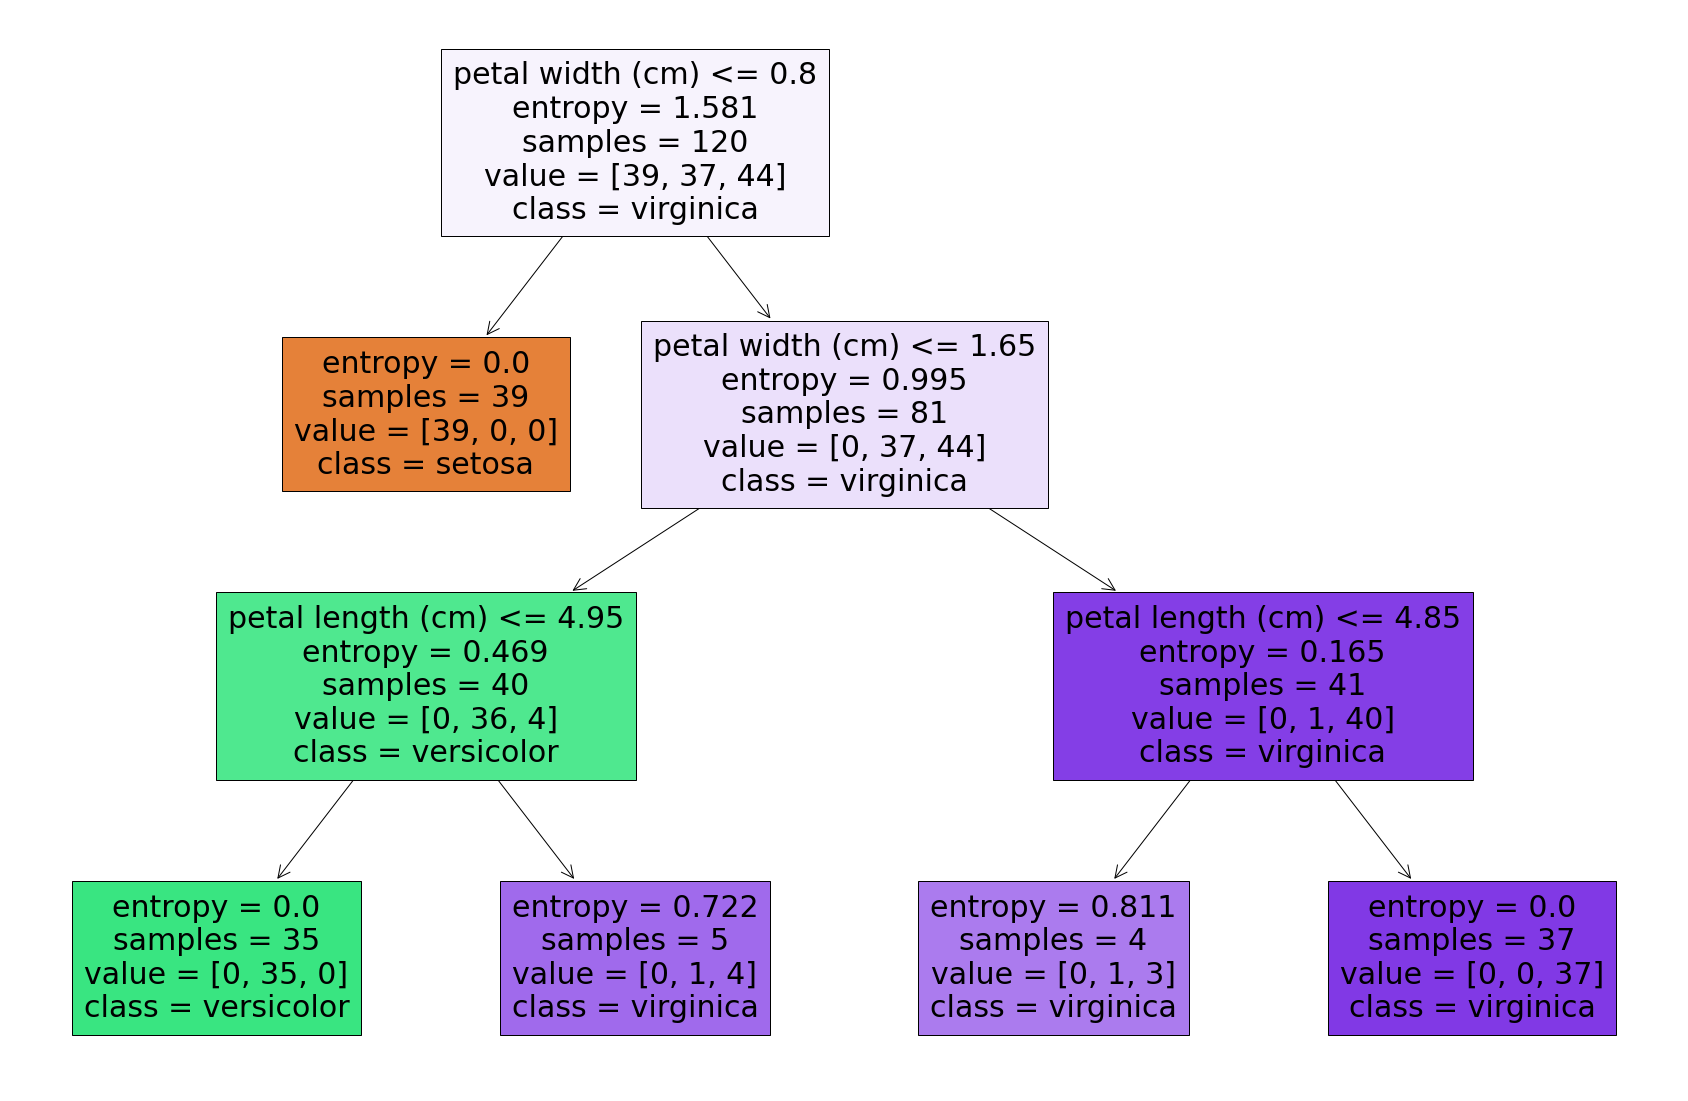

In [22]:
#visualize
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,20))
_ = plot_tree(model, feature_names=data["feature_names"],  class_names=data["target_names"], filled=True)